In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
# 2. Load dataset
df = pd.read_csv("uber.csv")
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
# 3. Data Preprocessing

# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'key'], inplace=True)

# Remove rows with missing values
df.dropna(inplace=True)

# Convert pickup_datetime to proper datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract useful features
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year

# Calculate simple distance using difference (not formula for simplicity)
df['distance'] = ((df['dropoff_longitude'] - df['pickup_longitude'])**2 +
                  (df['dropoff_latitude'] - df['pickup_latitude'])**2)**0.5


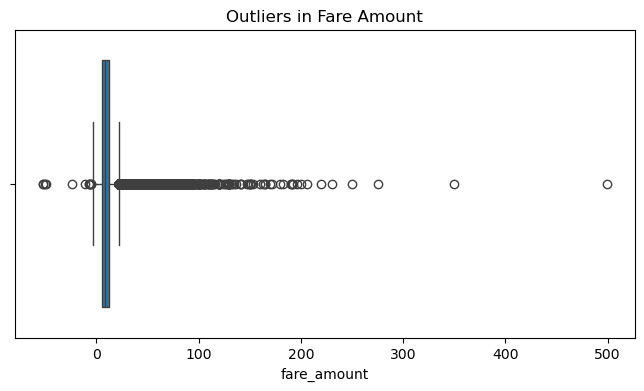

In [4]:
# 4. Identify Outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df['fare_amount'])
plt.title("Outliers in Fare Amount")
plt.show()


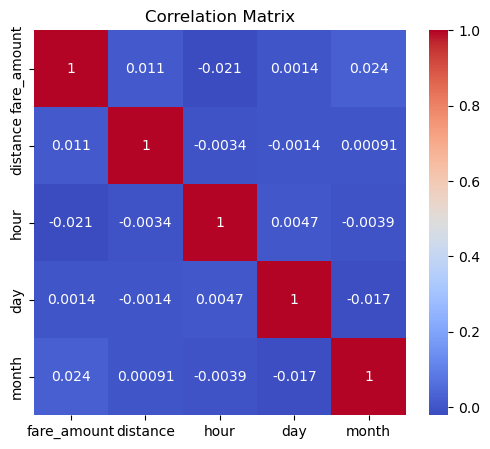

In [5]:
# 5. Check Correlation
plt.figure(figsize=(6,5))
sns.heatmap(df[['fare_amount', 'distance', 'hour', 'day', 'month']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [6]:
# 6. Prepare Data for Model
X = df[['distance', 'hour', 'day', 'month', 'year']]
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 7. Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression Results:")
print("R2 Score:", r2_lr)
print("RMSE:", rmse_lr)


Linear Regression Results:
R2 Score: 0.016378167401622457
RMSE: 10.115345406853999


In [9]:
# 8. Random Forest Model (Simplified and Faster)
rf = RandomForestRegressor(n_estimators=20, random_state=42, n_jobs=-1)  # fewer trees + parallel processing
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Results:")
print("R2 Score:", round(r2_rf, 3))
print("RMSE:", round(rmse_rf, 3))


Random Forest Results:
R2 Score: 0.677
RMSE: 5.797


In [11]:
# 9. Compare both models
print("\nModel Comparison:")
print("Linear Regression - R2:", r2_lr, " RMSE:", rmse_lr)
print("Random Forest - R2:", r2_rf, " RMSE:", rmse_rf)



Model Comparison:
Linear Regression - R2: 0.016378167401622457  RMSE: 10.115345406853999
Random Forest - R2: 0.6769890879088363  RMSE: 5.7966253833642565
